In [1]:
import numpy as np
import pandas as pd

In [5]:
import os 

user_folder_input = input("Enter your path : ")


def path(user_folder_input):
    folders = []
    files_in_folders = []
    files_names = []
    num = len(user_folder_input)
    for base, dirs, files in os.walk(user_folder_input):
        base_dir = base[num+1:]
        folders.append(base_dir)
        files_len = len(os.listdir(base))
        files_in_folders.append(files_len)   
        files_names.append(files)   
        
       
    return folders,files_in_folders,files_names


output = path(user_folder_input)
final_output = list(output)
final_output

print("Total number of folders in the given path  : " + str(final_output[1][:1]) + "\n")
print("Name of the Folders : " + str(final_output[0][1:]))
print("\n----------------------------------------------------------------------------------\n")

print("Total number of files : " + str(sum(final_output[1][1:])) + "\n")

for i, j in zip(final_output[0][1:], final_output[2][1:]):
    print("Files in " + i + " : " + str(j))
    print("Number of files in " + i + " : " + str(len(j)) + "\n")
    
print("\n----------------------------------------------------------------------------------\n")

Enter your path : C:\Users\hanan\Desktop\prepare\Untitled Folder
Total number of folders in the given path  : [4]

Name of the Folders : ['.ipynb_checkpoints']

----------------------------------------------------------------------------------

Total number of files : 1

Files in .ipynb_checkpoints : ['ANN Implementation-checkpoint.ipynb']
Number of files in .ipynb_checkpoints : 1


----------------------------------------------------------------------------------



In [6]:
#EDA

df =pd.read_csv('Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df_x = df.iloc[:,3:-1]

In [14]:
df_x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
df_Y = df.iloc[:,13]

In [16]:
df_Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
df_x.shape,df_Y.shape

((10000, 10), (10000,))

In [32]:
df_x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [37]:
df_x['Gender'].dtypes

dtype('O')

In [28]:
x = isinstance("Hello", (float, int, str, list, dict, tuple))
print('Is a an instance of str?', isinstance(a, str))
print('Is b an instance of str?', isinstance(b, str))

In [42]:
#categorical to numerical
geography=pd.get_dummies(df_x["Geography"],drop_first=True)
gender=pd.get_dummies(df_x['Gender'],drop_first=True)

In [45]:
#Adding converted categorical to numerical columns to data and removing categorical columns
#using concat method and drop method

df_x = df_x.drop(["Geography","Gender"],axis=1)

In [46]:
df_x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [48]:
df_x = pd.concat([df_x,geography,gender],axis=1)

In [49]:
df_x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [52]:
#train test split

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(df_x, df_Y, test_size = 0.2, random_state = 0)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaling  = StandardScaler()

x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test) 


In [54]:
#implementing ANN with keras

import tensorflow as tf
print(tf.__version__)

2.8.0


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

In [56]:
x_train.shape

(8000, 11)

In [57]:
classifier = Sequential()
#input layer
classifier.add(Dense(units=11,activation='relu'))
#1st hidden layer
classifier.add(Dense(units=6,activation='relu'))
#2st hidden layer
classifier.add(Dense(units=4,activation='relu'))
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

#compile loss
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#without dropout and early stopping

In [60]:
model_history=classifier.fit(x_train,Y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 2ms/step - loss: 0.5228 - accuracy: 0.7787 - val_loss: 0.4547 - val_accuracy: 0.7974
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.8115 - val_loss: 0.4004 - val_accuracy: 0.8251
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8397 - val_loss: 0.3820 - val_accuracy: 0.8289
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8453 - val_loss: 0.3773 - val_accuracy: 0.8379
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8477 - val_loss: 0.3754 - val_accuracy: 0.8398
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8511 - val_loss: 0.3702 - val_accuracy: 0.8406
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8503 - val_loss: 0.3694 - val_accuracy: 0.8470
Epoch 

In [62]:
#our custom learning rate 
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)

#add early stopping

earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


classifier.compile(optimizer=optimize,loss='binary_crossentropy',
                   metrics=['accuracy'])
model_history=classifier.fit(x_train,Y_train,validation_split=0.33,
                             batch_size=10,
                             epochs=50,
                             callbacks=earlystop)

Epoch 1/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.8673 - val_loss: 0.3635 - val_accuracy: 0.8508
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.8664 - val_loss: 0.3636 - val_accuracy: 0.8512
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.8670 - val_loss: 0.3639 - val_accuracy: 0.8508
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.8671 - val_loss: 0.3640 - val_accuracy: 0.8516
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.8662 - val_loss: 0.3641 - val_accuracy: 0.8504
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.8660 - val_loss: 0.3643 - val_accuracy: 0.8508
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.8660 - val_loss: 0.3643 - val_accuracy: 0.8516
Epoch 

In [65]:
#with dropout and early stopping

classifier = Sequential()
#input layer
classifier.add(Dense(units=11,activation='relu'))

#Add dropout
classifier.add(Dropout(0.2))
#1st hidden layer
classifier.add(Dense(units=6,activation='relu'))
#2st hidden layer
classifier.add(Dense(units=4,activation='relu'))
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

#custom learning rate value
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)

#compile loss
classifier.compile(optimizer=optimize,loss='binary_crossentropy',
                   metrics=['accuracy'])
model_history=classifier.fit(x_train,Y_train,validation_split=0.33,
                             batch_size=10,
                             epochs=100,
                             callbacks=earlystop)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.8046 - val_loss: 0.4415 - val_accuracy: 0.8156
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8127 - val_loss: 0.4115 - val_accuracy: 0.8236
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8169 - val_loss: 0.4260 - val_accuracy: 0.8179
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8315 - val_loss: 0.4035 - val_accuracy: 0.8311
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8293 - val_loss: 0.3861 - val_accuracy: 0.8281
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3884 - accuracy: 0.8350 - val_loss: 0.3872 - val_accuracy: 0.8319
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8412 - val_loss: 0.3820 - val_accuracy: 0.8353

In [66]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


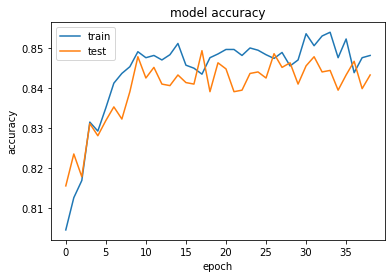

In [68]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

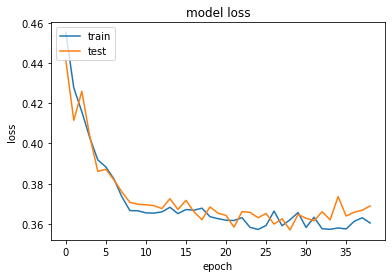

In [69]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
#Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1537,   58],
       [ 219,  186]], dtype=int64)

In [75]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [76]:
score

0.8615